In [1]:
import pandas as pd
import numpy as np

In [5]:
# Creating a Series by passing a list of values, letting pandas create a default integer index
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20210101", periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2021-01-01,1.258920,-1.570750,-0.414191,0.554382
2021-01-02,-0.947981,0.829520,0.139464,-0.080547
2021-01-03,0.174162,-0.160459,-0.080424,1.190025
2021-01-04,1.565061,0.255003,-1.724564,-0.065013
2021-01-05,1.352008,1.378452,-0.695065,-1.957344
2021-01-06,-0.068687,-0.615213,-0.041064,1.061883


In [9]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20210102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2021-01-02,1.0,3,test,foo
1,1.0,2021-01-02,1.0,3,train,foo
2,1.0,2021-01-02,1.0,3,test,foo
3,1.0,2021-01-02,1.0,3,train,foo


In [10]:
# The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
df.head()

,A,B,C,D
2021-01-01,1.258920,-1.570750,-0.414191,0.554382
2021-01-02,-0.947981,0.829520,0.139464,-0.080547
2021-01-03,0.174162,-0.160459,-0.080424,1.190025
2021-01-04,1.565061,0.255003,-1.724564,-0.065013
2021-01-05,1.352008,1.378452,-0.695065,-1.957344


In [12]:
df.tail(3)

,A,B,C,D
2021-01-04,1.565061,0.255003,-1.724564,-0.065013
2021-01-05,1.352008,1.378452,-0.695065,-1.957344
2021-01-06,-0.068687,-0.615213,-0.041064,1.061883


In [13]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.to_numpy()

array([[ 1.25891982, -1.57075019, -0.41419132,  0.55438248],
       [-0.94798097,  0.82952033,  0.13946444, -0.08054728],
       [ 0.17416161, -0.16045874, -0.08042441,  1.19002529],
       [ 1.56506081,  0.25500265, -1.72456355, -0.06501333],
       [ 1.35200835,  1.37845155, -0.69506484, -1.95734395],
       [-0.06868701, -0.61521266, -0.04106374,  1.0618826 ]])

In [16]:
df2.to_numpy()

array([[1.0, Timestamp('2021-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2021-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2021-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2021-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.555580,0.019425,-0.469307,0.117231
std,0.994376,1.050950,0.683359,1.149830
min,-0.947981,-1.570750,-1.724564,-1.957344
25%,-0.007975,-0.501524,-0.624846,-0.076664
50%,0.716541,0.047272,-0.247308,0.244685
75%,1.328736,0.685891,-0.050904,0.935008
max,1.565061,1.378452,0.139464,1.190025


In [18]:
df.T

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,1.258920,-0.947981,0.174162,1.565061,1.352008,-0.068687
B,-1.570750,0.829520,-0.160459,0.255003,1.378452,-0.615213
C,-0.414191,0.139464,-0.080424,-1.724564,-0.695065,-0.041064
D,0.554382,-0.080547,1.190025,-0.065013,-1.957344,1.061883


In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-01-01,0.554382,-0.414191,-1.570750,1.258920
2021-01-02,-0.080547,0.139464,0.829520,-0.947981
2021-01-03,1.190025,-0.080424,-0.160459,0.174162
2021-01-04,-0.065013,-1.724564,0.255003,1.565061
2021-01-05,-1.957344,-0.695065,1.378452,1.352008
2021-01-06,1.061883,-0.041064,-0.615213,-0.068687


In [20]:
df.sort_values(by="B")

,A,B,C,D
2021-01-01,1.258920,-1.570750,-0.414191,0.554382
2021-01-06,-0.068687,-0.615213,-0.041064,1.061883
2021-01-03,0.174162,-0.160459,-0.080424,1.190025
2021-01-04,1.565061,0.255003,-1.724564,-0.065013
2021-01-02,-0.947981,0.829520,0.139464,-0.080547
2021-01-05,1.352008,1.378452,-0.695065,-1.957344


In [21]:
df["A"]

2021-01-01    1.258920
2021-01-02   -0.947981
2021-01-03    0.174162
2021-01-04    1.565061
2021-01-05    1.352008
2021-01-06   -0.068687
Freq: D, Name: A, dtype: float64

In [22]:
df[0:3]

,A,B,C,D
2021-01-01,1.258920,-1.570750,-0.414191,0.554382
2021-01-02,-0.947981,0.829520,0.139464,-0.080547
2021-01-03,0.174162,-0.160459,-0.080424,1.190025


In [24]:
df["20210102":"20210104"]

,A,B,C,D
2021-01-02,-0.947981,0.829520,0.139464,-0.080547
2021-01-03,0.174162,-0.160459,-0.080424,1.190025
2021-01-04,1.565061,0.255003,-1.724564,-0.065013


In [25]:
df.loc[dates[0]]

A    1.258920
B   -1.570750
C   -0.414191
D    0.554382
Name: 2021-01-01 00:00:00, dtype: float64

In [26]:
df.loc[:, ["A", "B"]]

,A,B
2021-01-01,1.258920,-1.570750
2021-01-02,-0.947981,0.829520
2021-01-03,0.174162,-0.160459
2021-01-04,1.565061,0.255003
2021-01-05,1.352008,1.378452
2021-01-06,-0.068687,-0.615213


In [28]:
df.loc["20210102": "20210104", ["A", "B"]]

,A,B
2021-01-02,-0.947981,0.829520
2021-01-03,0.174162,-0.160459
2021-01-04,1.565061,0.255003


In [29]:
df.loc["20210102", ["A", "B"]]

A   -0.947981
B    0.829520
Name: 2021-01-02 00:00:00, dtype: float64

In [31]:
# For getting scalar value
df.loc[dates[0], "A"]

1.2589198205162244

In [32]:
# For getting fast access to scalar
df.at[dates[0], "A"]

1.2589198205162244

In [33]:
# Select via the position the passed integers
df.iloc[3]

A    1.565061
B    0.255003
C   -1.724564
D   -0.065013
Name: 2021-01-04 00:00:00, dtype: float64

In [34]:
df.iloc[3:5, 0:2]

,A,B
2021-01-04,1.565061,0.255003
2021-01-05,1.352008,1.378452


In [35]:
df.iloc[[1,2,4], [0,2]]

,A,C
2021-01-02,-0.947981,0.139464
2021-01-03,0.174162,-0.080424
2021-01-05,1.352008,-0.695065


In [36]:
# slicing row explicity
df.iloc[1:3, :]

,A,B,C,D
2021-01-02,-0.947981,0.829520,0.139464,-0.080547
2021-01-03,0.174162,-0.160459,-0.080424,1.190025


In [37]:
df.iloc[:, 1:3]

,B,C
2021-01-01,-1.570750,-0.414191
2021-01-02,0.829520,0.139464
2021-01-03,-0.160459,-0.080424
2021-01-04,0.255003,-1.724564
2021-01-05,1.378452,-0.695065
2021-01-06,-0.615213,-0.041064


In [38]:
df.iloc[1, 1]

0.8295203275840658

In [40]:
df.iat[1,1]

0.8295203275840658

In [41]:
# Boolean Indexing
df[df["A"] > 0]

,A,B,C,D
2021-01-01,1.258920,-1.570750,-0.414191,0.554382
2021-01-03,0.174162,-0.160459,-0.080424,1.190025
2021-01-04,1.565061,0.255003,-1.724564,-0.065013
2021-01-05,1.352008,1.378452,-0.695065,-1.957344


In [42]:
# Selecting values from a DataFrame where a boolean condition is met.
df[df > 0]

,A,B,C,D
2021-01-01,1.258920,NaN,NaN,0.554382
2021-01-02,NaN,0.829520,0.139464,NaN
2021-01-03,0.174162,NaN,NaN,1.190025
2021-01-04,1.565061,0.255003,NaN,NaN
2021-01-05,1.352008,1.378452,NaN,NaN
2021-01-06,NaN,NaN,NaN,1.061883


In [43]:
# using isin() method for filtering
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2021-01-01,1.258920,-1.570750,-0.414191,0.554382,one
2021-01-02,-0.947981,0.829520,0.139464,-0.080547,one
2021-01-03,0.174162,-0.160459,-0.080424,1.190025,two
2021-01-04,1.565061,0.255003,-1.724564,-0.065013,three
2021-01-05,1.352008,1.378452,-0.695065,-1.957344,four
2021-01-06,-0.068687,-0.615213,-0.041064,1.061883,three


In [45]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2021-01-03,0.174162,-0.160459,-0.080424,1.190025,two
2021-01-05,1.352008,1.378452,-0.695065,-1.957344,four


In [47]:
# Setting a new column automatically align the data the indexes
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20210102", periods=6))
s1

2021-01-02    1
2021-01-03    2
2021-01-04    3
2021-01-05    4
2021-01-06    5
2021-01-07    6
Freq: D, dtype: int64

In [49]:
df["F"] = s1
df

,A,B,C,D,F
2021-01-01,1.258920,-1.570750,-0.414191,0.554382,NaN
2021-01-02,-0.947981,0.829520,0.139464,-0.080547,1.0
2021-01-03,0.174162,-0.160459,-0.080424,1.190025,2.0
2021-01-04,1.565061,0.255003,-1.724564,-0.065013,3.0
2021-01-05,1.352008,1.378452,-0.695065,-1.957344,4.0
2021-01-06,-0.068687,-0.615213,-0.041064,1.061883,5.0


In [52]:
# setting value by label
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2021-01-01,0.000000,-1.570750,-0.414191,0.554382,NaN
2021-01-02,-0.947981,0.829520,0.139464,-0.080547,1.0
2021-01-03,0.174162,-0.160459,-0.080424,1.190025,2.0
2021-01-04,1.565061,0.255003,-1.724564,-0.065013,3.0
2021-01-05,1.352008,1.378452,-0.695065,-1.957344,4.0
2021-01-06,-0.068687,-0.615213,-0.041064,1.061883,5.0


In [53]:
# setting value by position
df.iat[0, 1] = 0
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-0.414191,0.554382,NaN
2021-01-02,-0.947981,0.829520,0.139464,-0.080547,1.0
2021-01-03,0.174162,-0.160459,-0.080424,1.190025,2.0
2021-01-04,1.565061,0.255003,-1.724564,-0.065013,3.0
2021-01-05,1.352008,1.378452,-0.695065,-1.957344,4.0
2021-01-06,-0.068687,-0.615213,-0.041064,1.061883,5.0


In [54]:
# setting by assign with  NumPy array
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-0.414191,5,NaN
2021-01-02,-0.947981,0.829520,0.139464,5,1.0
2021-01-03,0.174162,-0.160459,-0.080424,5,2.0
2021-01-04,1.565061,0.255003,-1.724564,5,3.0
2021-01-05,1.352008,1.378452,-0.695065,5,4.0
2021-01-06,-0.068687,-0.615213,-0.041064,5,5.0


In [55]:
# where opeation with ssetting
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-0.414191,-5,NaN
2021-01-02,-0.947981,-0.829520,-0.139464,-5,-1.0
2021-01-03,-0.174162,-0.160459,-0.080424,-5,-2.0
2021-01-04,-1.565061,-0.255003,-1.724564,-5,-3.0
2021-01-05,-1.352008,-1.378452,-0.695065,-5,-4.0
2021-01-06,-0.068687,-0.615213,-0.041064,-5,-5.0


In [56]:
# Missing Data
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]: dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-0.414191,5,NaN,1.0
2021-01-02,-0.947981,0.829520,0.139464,5,1.0,1.0
2021-01-03,0.174162,-0.160459,-0.080424,5,2.0,NaN
2021-01-04,1.565061,0.255003,-1.724564,5,3.0,NaN


In [58]:
# to drop rows that have missing data
df1.dropna(how="any")

,A,B,C,D,F,E
2021-01-02,-0.947981,0.82952,0.139464,5,1.0,1.0


In [60]:
# filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,-0.414191,5,5.0,1.0
2021-01-02,-0.947981,0.829520,0.139464,5,1.0,1.0
2021-01-03,0.174162,-0.160459,-0.080424,5,2.0,5.0
2021-01-04,1.565061,0.255003,-1.724564,5,3.0,5.0


In [61]:
pd.isna(df1)

,A,B,C,D,F,E
2021-01-01,False,False,False,False,True,False
2021-01-02,False,False,False,False,False,False
2021-01-03,False,False,False,False,False,True
2021-01-04,False,False,False,False,False,True


In [64]:
# Operations
# performing a dexriptive static
df.mean()

A    0.345760
B    0.281217
C   -0.469307
D    5.000000
F    3.000000
dtype: float64

In [65]:
# same operation on the other axis
df.mean(1)

2021-01-01    1.146452
2021-01-02    1.204201
2021-01-03    1.386656
2021-01-04    1.619100
2021-01-05    2.207079
2021-01-06    1.855007
Freq: D, dtype: float64

In [66]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2021-01-01    NaN
2021-01-02    NaN
2021-01-03    1.0
2021-01-04    3.0
2021-01-05    5.0
2021-01-06    NaN
Freq: D, dtype: float64

In [67]:
df.sub(s, axis="index")

,A,B,C,D,F
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,-0.825838,-1.160459,-1.080424,4.0,1.0
2021-01-04,-1.434939,-2.744997,-4.724564,2.0,0.0
2021-01-05,-3.647992,-3.621548,-5.695065,0.0,-1.0
2021-01-06,NaN,NaN,NaN,NaN,NaN


In [68]:
# Apply
# dapplying functions to the data
df.apply(np.cumsum)

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-0.414191,5,NaN
2021-01-02,-0.947981,0.829520,-0.274727,10,1.0
2021-01-03,-0.773819,0.669062,-0.355151,15,3.0
2021-01-04,0.791241,0.924064,-2.079715,20,6.0
2021-01-05,2.143250,2.302516,-2.774780,25,10.0
2021-01-06,2.074563,1.687303,-2.815843,30,15.0


In [72]:
df.apply(lambda x: x.max() - x.min())

A    2.513042
B    1.993664
C    1.864028
D    0.000000
F    4.000000
dtype: float64

In [75]:
# Histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    0
2    5
3    5
4    3
5    6
6    0
7    1
8    5
9    4
dtype: int64

In [76]:
s.value_counts()

5    4
0    2
3    1
6    1
1    1
4    1
dtype: int64

In [77]:
# String methods
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [79]:
# Merge
# concat
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.435746,-0.335433,-0.849914,0.902498
1,-0.058733,-0.834211,1.284271,0.155257
2,1.244907,2.419579,-0.194646,-0.820447
3,0.940079,-0.381133,1.931964,0.746646
4,0.583356,-0.156204,0.935010,0.833393
5,-1.116055,1.531884,-0.365126,-0.450607
6,-0.456657,1.243341,0.112651,1.075824
7,-1.249404,-0.611344,0.919048,-1.142146
8,0.460329,-0.445872,-0.423567,-1.828336
9,-0.717028,1.031245,0.193002,2.184549


In [82]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.435746,-0.335433,-0.849914,0.902498
1,-0.058733,-0.834211,1.284271,0.155257
2,1.244907,2.419579,-0.194646,-0.820447
3,0.940079,-0.381133,1.931964,0.746646
4,0.583356,-0.156204,0.935010,0.833393
5,-1.116055,1.531884,-0.365126,-0.450607
6,-0.456657,1.243341,0.112651,1.075824
7,-1.249404,-0.611344,0.919048,-1.142146
8,0.460329,-0.445872,-0.423567,-1.828336
9,-0.717028,1.031245,0.193002,2.184549


In [83]:
# Join
# SQL Style
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [84]:
left

,key,lval
0,foo,1
1,foo,2


In [86]:
right

,key,rval
0,foo,4
1,foo,5


In [87]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [88]:
# Grouping
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.856540,-0.417095
1,bar,one,0.176254,0.952551
2,foo,two,0.594352,-1.823516
3,bar,three,0.526205,-0.847385
4,foo,two,-0.482373,-2.247319
5,bar,two,0.939668,-0.821479
6,foo,one,2.043448,-1.001145
7,foo,three,-0.497958,-0.983794


In [89]:
df.groupby("A").sum()

,C,D
A,,
bar,1.642127,-0.716312
foo,0.800929,-6.472870


In [90]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.176254  0.952551
    three  0.526205 -0.847385
    two    0.939668 -0.821479
foo one    1.186908 -1.418241
    three -0.497958 -0.983794
    two    0.111979 -4.070835

In [92]:
# Reshaping
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.916205 -1.213027
      two     1.839387  0.157198
baz   one     0.109544  0.089019
      two     0.985257 -1.539002

In [95]:
# The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.916205
               B   -1.213027
       two     A    1.839387
               B    0.157198
baz    one     A    0.109544
               B    0.089019
       two     A    0.985257
               B   -1.539002
dtype: float64

In [96]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one    -0.916205 -1.213027
      two     1.839387  0.157198
baz   one     0.109544  0.089019
      two     0.985257 -1.539002

In [97]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.916205  1.839387
      B -1.213027  0.157198
baz   A  0.109544  0.985257
      B  0.089019 -1.539002

In [98]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.916205  0.109544
       B -1.213027  0.089019
two    A  1.839387  0.985257
       B  0.157198 -1.539002

In [99]:
#n Pivot Table
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,1.734038,0.021450
1,one,B,foo,-0.131734,3.521496
2,two,C,foo,1.812222,-1.472999
3,three,A,bar,-1.111074,0.117645
4,one,B,bar,-0.344225,0.679046
5,one,C,bar,1.026694,-0.248956
6,two,A,foo,-0.282589,0.616461
7,three,B,foo,1.988881,-1.063122
8,one,C,foo,0.370869,0.741620
9,one,A,bar,-0.962498,1.081941


In [100]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.962498  1.734038
      B -0.344225 -0.131734
      C  1.026694  0.370869
three A -1.111074       NaN
      B       NaN  1.988881
      C  1.874239       NaN
two   A       NaN -0.282589
      B  0.274798       NaN
      C       NaN  1.812222

In [108]:
# Time series
rng = pd.date_range("20210101", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("1Min").sum()

2021-01-01 00:00:00    13813
2021-01-01 00:01:00    10034
Freq: T, dtype: int64

In [109]:
rng = pd.date_range("20210306", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2021-03-06    0.495709
2021-03-07   -0.557705
2021-03-08   -0.254291
2021-03-09    2.208833
2021-03-10   -0.351535
Freq: D, dtype: float64

In [110]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2021-03-06 00:00:00+00:00    0.495709
2021-03-07 00:00:00+00:00   -0.557705
2021-03-08 00:00:00+00:00   -0.254291
2021-03-09 00:00:00+00:00    2.208833
2021-03-10 00:00:00+00:00   -0.351535
Freq: D, dtype: float64

In [112]:
rng = pd.date_range("20210101", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2021-01-31   -0.733057
2021-02-28   -0.784658
2021-03-31   -0.341354
2021-04-30   -0.729368
2021-05-31   -0.003459
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()
ps

2021-01   -0.733057
2021-02   -0.784658
2021-03   -0.341354
2021-04   -0.729368
2021-05   -0.003459
Freq: M, dtype: float64

In [114]:
ps.to_timestamp()

2021-01-01   -0.733057
2021-02-01   -0.784658
2021-03-01   -0.341354
2021-04-01   -0.729368
2021-05-01   -0.003459
Freq: MS, dtype: float64

In [117]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -1.272364
1990-06-01 09:00    1.586967
1990-09-01 09:00    0.475485
1990-12-01 09:00   -1.367183
1991-03-01 09:00    0.094373
Freq: H, dtype: float64

In [118]:
# Categoricals
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [119]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [120]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [121]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [122]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [123]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [124]:
# Plotting
import matplotlib.pyplot as plt
plt.close("all")

<AxesSubplot:>

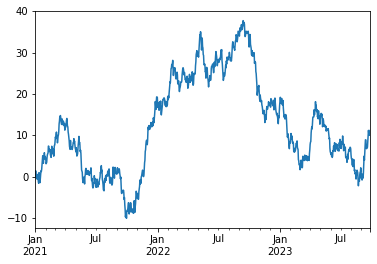

In [127]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("20210101", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

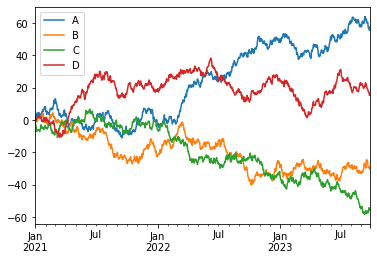

In [135]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")